## Task: Extracting Clothing from an Image

The goal is to generate a transparent image containing only the clothing worn by a person, with all human body parts removed.

In [9]:
from __future__ import annotations

from typing import Any

import cv2
import PIL.Image
import numpy as np
import matplotlib.pyplot as plt


def show_image(image: Any, title: str = "Image") -> None:
    """
    Display an image using matplotlib.

    Args:
        image (PIL.Image.Image): The image to display.
        title (str): The title of the image window.
    """
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')  # Hide axes
    plt.show()

Since we have the freedom to choose the background color, we'd like to pick some color that is very different from the clothing, so that the segmentation can be done very fast and easily without AI.

The common choice for the background color is pure green (RGB = (0, 255, 0)).

Thus we can iterate on every pixel of the image, and check if that pixel is purely green. This will generate a binary mask for the clothing.

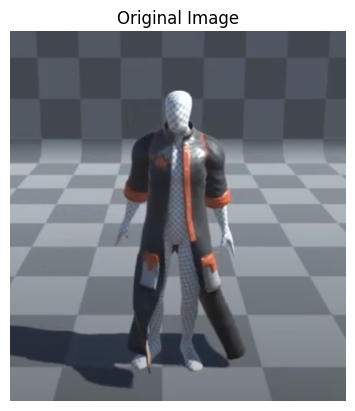

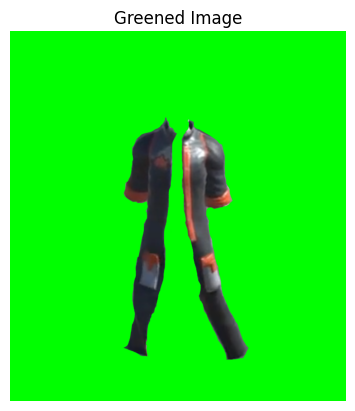

In [10]:
# Show the original image
img_original = PIL.Image.open("./data/original.png")
show_image(img_original, "Original Image")

# Show the greened image
img_greened = PIL.Image.open("./data/greened.png")
show_image(img_greened, "Greened Image")

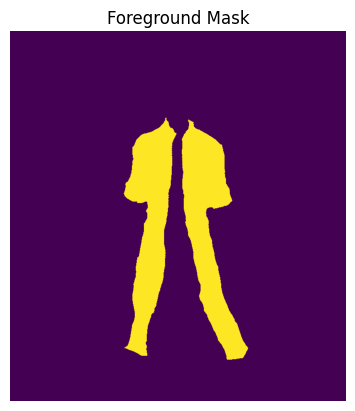

True

In [11]:
# Read the image using OpenCV and generate binary mask

# Load greened image using OpenCV
img = cv2.imread("./data/greened.png")

# Convert the image to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Mask for green background
lower_green = np.array([40, 100, 100])
upper_green = np.array([80, 255, 255])
bg_mask = cv2.inRange(hsv, lower_green, upper_green)

# Invert background mask: 255 where not background
fg_mask = cv2.bitwise_not(bg_mask)

show_image(fg_mask, "Foreground Mask")

# Write the foreground mask to a file
cv2.imwrite("./data/fg_mask.png", fg_mask)

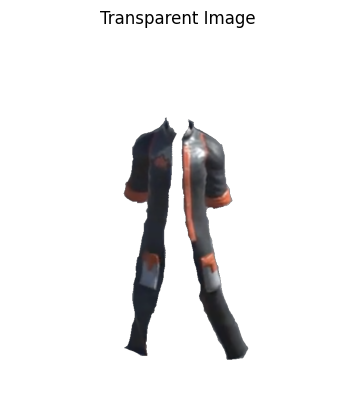

True

In [12]:
# Apply the mask to the original image to obtain a transparent image

# Read the original image using OpenCV
img_bgr = cv2.imread("./data/original.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Mask the original image with the foreground mask
alpha = fg_mask
img_rgb_masked = cv2.bitwise_and(img_rgb, img_rgb, mask=alpha)
img_rgba = np.dstack([img_rgb_masked, alpha])

show_image(img_rgba, "Transparent Image")

# Save the transparent image
cv2.imwrite("./data/transparent.png",
            cv2.cvtColor(img_rgba, cv2.COLOR_BGR2RGBA))